In [1]:
import numpy as np
import xarray as xr
import xsimlab as xs
import matplotlib.pyplot as plt

from thermal import single_node

orbit_tau = 5400


In [2]:
single_node

<xsimlab.Model (3 processes, 12 inputs)>
spacecraft
    radius        [in] spacecraft radius [m]
    emis          [in] spacecraft emissivity
    absorb        [in] spacecraft absorptivity
    mass          [in] spacecraft mass [kg]
    spec_heat     [in] spacecraft specific heat
    Q_gen         [in] spacecraft power dissipation
orbit
    R             [in] body radius
    h             [in] orbit altitude
    tau           [in] orbit period
    case          [in] hot/ cold case
    beta          [in] beta, radians
thermal
    T_init        [in] initial temperature

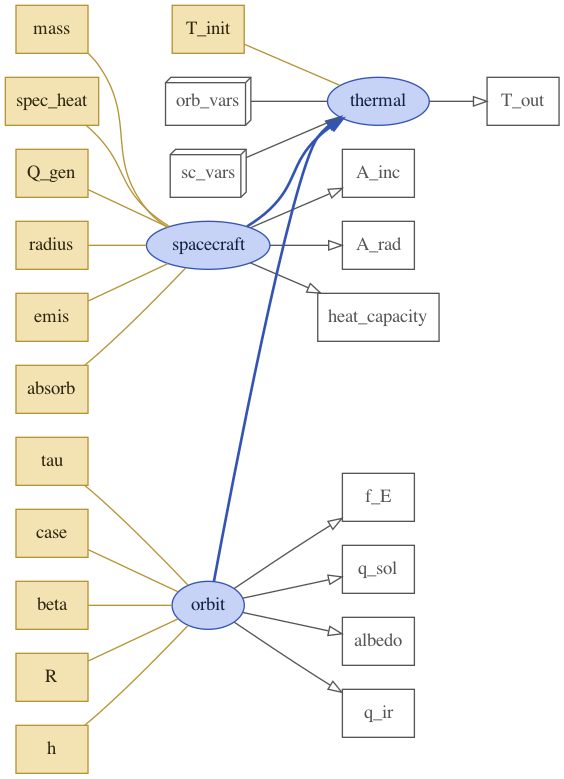

In [3]:
node_diag = single_node.visualize(show_variables='in')
node_diag

In [4]:
# %load_ext xsimlab.ipython

In [5]:
# %create_setup single_node --default --verbose
import xsimlab as xs

ds_in = xs.create_setup(
    model=single_node,
    clocks={
        'time': np.linspace(0,6*orbit_tau, 2000)

    },
    input_vars={
        # spacecraft radius [m]
        'spacecraft__radius': 0.2111,
        # spacecraft emissivity
        'spacecraft__emis': 0.9,
        # spacecraft absorptivity
        'spacecraft__absorb': 0.9,
        # spacecraft mass [kg]
        'spacecraft__mass': 4.0,
        # spacecraft specific heat
        'spacecraft__spec_heat': 897.0,
        # spacecraft power dissipation
        'spacecraft__Q_gen': 15.0,
        # body radius
        'orbit__R': 6378100.0,
        # orbit altitude
        'orbit__h': 525000.0,
        # orbit period
        'orbit__tau': 5400,
        # hot/ cold case
        'orbit__case': 'hot',
        # beta, radians
        'orbit__beta': 0,
        # initial temperature
        'thermal__T_init': 290.0,
    },
    output_vars={
    'thermal__T_out': 'time'
    }
)


In [6]:
single_node.all_vars_dict

{'spacecraft': ['radius',
  'emis',
  'absorb',
  'mass',
  'spec_heat',
  'Q_gen',
  'A_inc',
  'A_rad',
  'heat_capacity'],
 'orbit': ['R', 'h', 'tau', 'case', 'beta', 'f_E', 'q_sol', 'albedo', 'q_ir'],
 'thermal': ['T_init', 'T_out', 'orb_vars', 'sc_vars']}

In [7]:
# %create_setup single_node --default --verbose

In [8]:
ds_in

<xarray.Dataset>
Dimensions:                (time: 2000)
Coordinates:
  * time                   (time) float64 0.0 16.21 32.42 ... 3.238e+04 3.24e+04
Data variables:
    spacecraft__radius     float64 0.2111
    spacecraft__emis       float64 0.9
    spacecraft__absorb     float64 0.9
    spacecraft__mass       float64 4.0
    spacecraft__spec_heat  float64 897.0
    spacecraft__Q_gen      float64 15.0
    orbit__R               float64 6.378e+06
    orbit__h               float64 5.25e+05
    orbit__tau             int64 5400
    orbit__case            <U3 'hot'
    orbit__beta            int64 0
    thermal__T_init        float64 290.0

In [9]:
ds_out = ds_in.xsimlab.run(model=single_node)

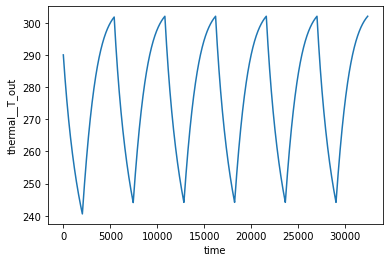

In [10]:
ds_out.thermal__T_out.plot()

In [11]:
ds_out.max()

<xarray.Dataset>
Dimensions:                ()
Data variables: (12/13)
    orbit__R               float64 6.378e+06
    orbit__beta            int64 0
    orbit__case            object 'hot'
    orbit__h               float64 5.25e+05
    orbit__tau             int64 5400
    spacecraft__Q_gen      float64 15.0
    ...                     ...
    spacecraft__emis       float64 0.9
    spacecraft__mass       float64 4.0
    spacecraft__radius     float64 0.2111
    spacecraft__spec_heat  float64 897.0
    thermal__T_init        float64 290.0
    thermal__T_out         float64 302.0

In [12]:
ds_in_batch = ds_in.xsimlab.update_vars(
   model=single_node,
   input_vars={'spacecraft__mass': ('batch', [1., 3., 5., 10, 15])}
)

ds_out_batch = ds_in_batch.xsimlab.run(model=single_node, batch_dim='batch')

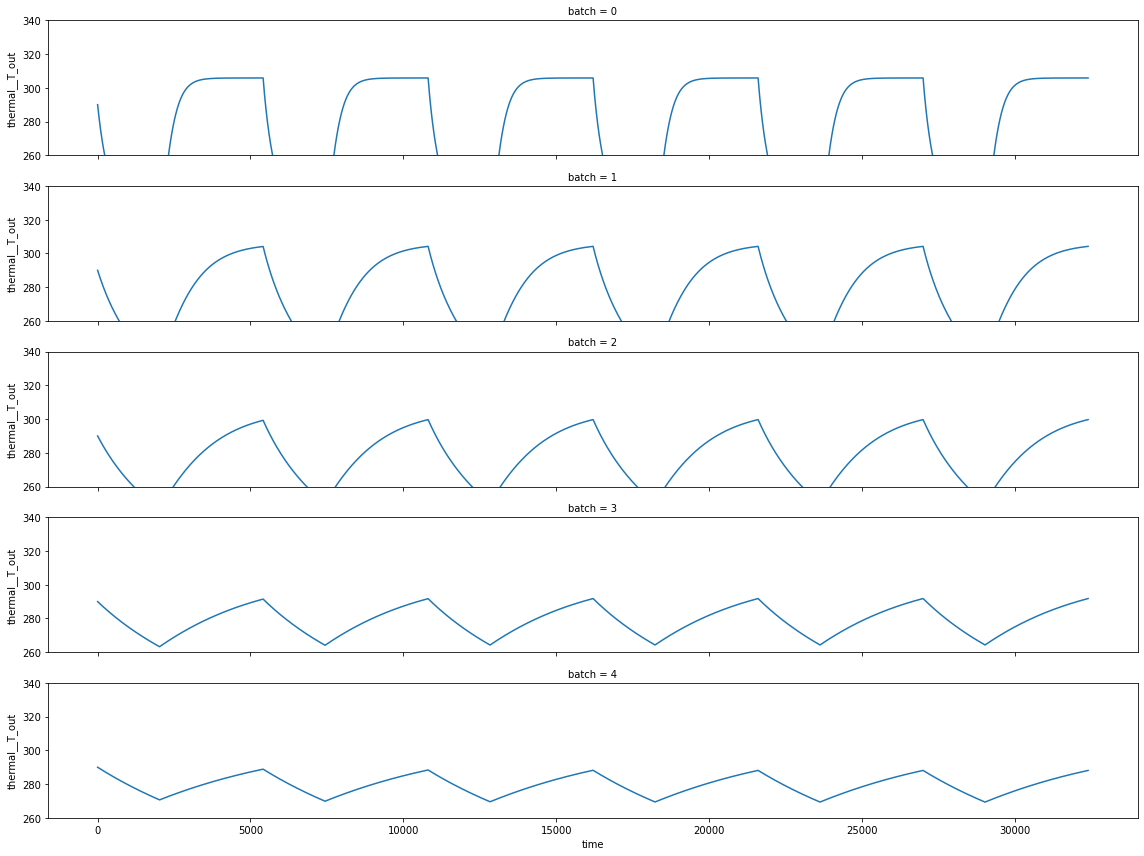

In [13]:
ds_out_batch.thermal__T_out.plot.line(hue='batch', row='batch', figsize=(16, 12), ylim=(260, 340))

In [14]:
ds_out_batch

<xarray.Dataset>
Dimensions:                (batch: 5, time: 2000)
Coordinates:
  * time                   (time) float64 0.0 16.21 32.42 ... 3.238e+04 3.24e+04
Dimensions without coordinates: batch
Data variables: (12/13)
    orbit__R               float64 6.378e+06
    orbit__beta            int64 0
    orbit__case            <U3 'hot'
    orbit__h               float64 5.25e+05
    orbit__tau             int64 5400
    spacecraft__Q_gen      float64 15.0
    ...                     ...
    spacecraft__emis       float64 0.9
    spacecraft__mass       (batch) float64 1.0 3.0 5.0 10.0 15.0
    spacecraft__radius     float64 0.2111
    spacecraft__spec_heat  float64 897.0
    thermal__T_init        float64 290.0
    thermal__T_out         (batch, time) float64 290.0 287.2 ... 288.0 288.1

In [21]:
ds_in_batch = ds_in.xsimlab.update_vars(
   model=single_node,
   input_vars={'spacecraft__Q_gen': ('batch', [5., 10., 15., 20., 45., 75.])}
)

ds_out_batch = ds_in_batch.xsimlab.run(model=single_node, batch_dim='batch')

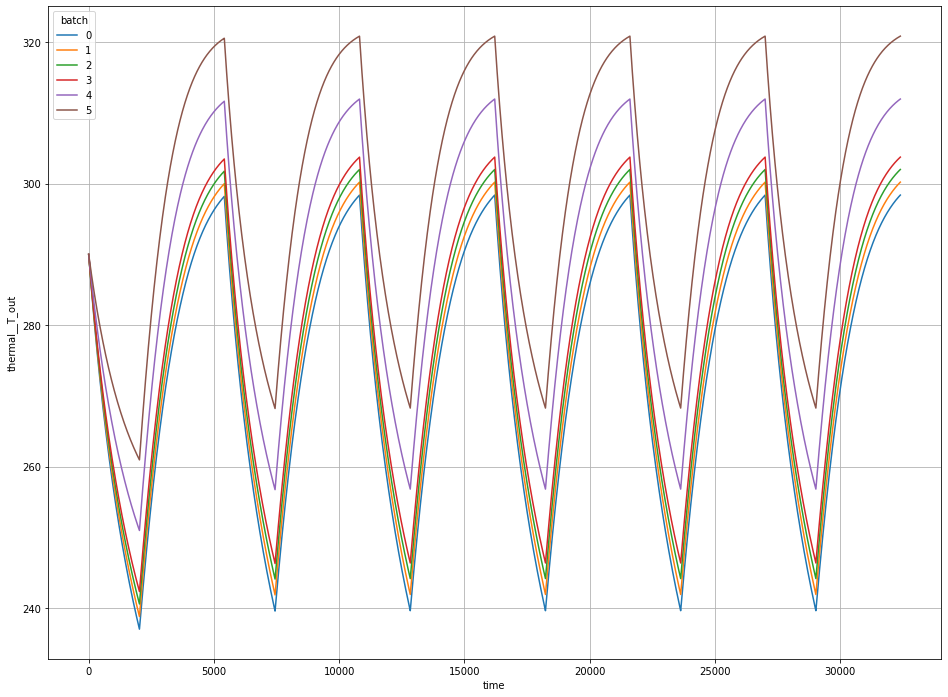

In [22]:
ds_out_batch.thermal__T_out.plot(hue='batch', figsize=(16, 12))
plt.grid()

In [23]:
ds_in_batch = ds_in.xsimlab.update_vars(
   model=single_node,
   input_vars={'orbit__case': ('batch', ['hot', 'cold'])}
)

ds_out_batch = ds_in_batch.xsimlab.run(model=single_node, batch_dim='batch')

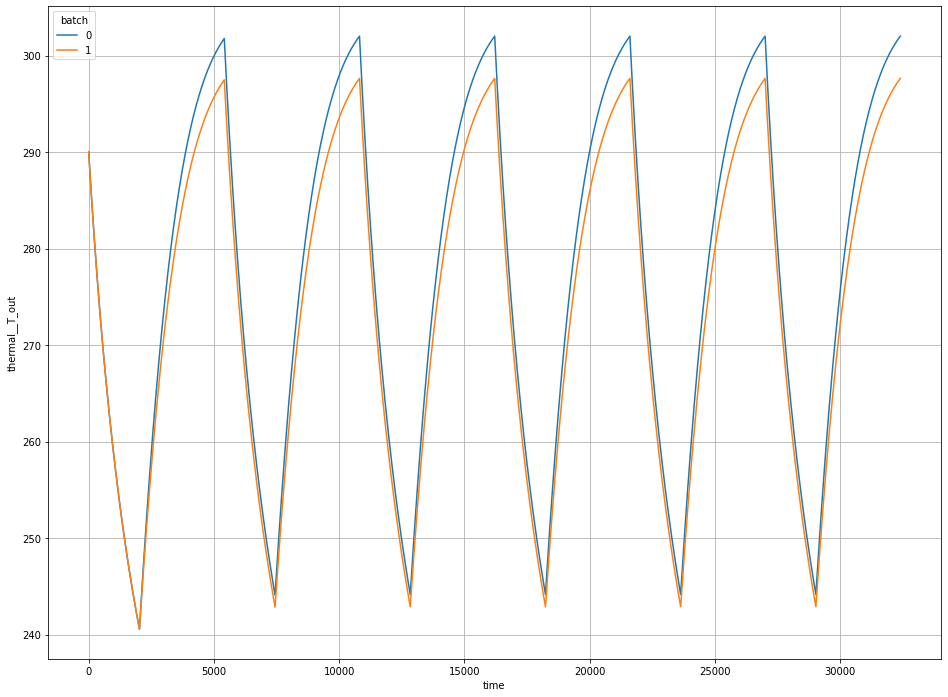

In [24]:
ds_out_batch.thermal__T_out.plot.line(hue='batch', figsize=(16, 12))
plt.grid()

In [25]:
radii = [0.2, 0.4, 0.8, 1.2, 2.4]

ds_in_batch = ds_in.xsimlab.update_vars(
   model=single_node,
   input_vars={'spacecraft__Q_gen': 45.,
               'spacecraft__mass': 80.,
               'spacecraft__radius': ('batch', radii)
   }
)

ds_out_batch = ds_in_batch.xsimlab.run(model=single_node, batch_dim='batch')

# ds_out_batch.thermal__T_out.plot(row='batch', figsize=(12, 10))

# ds_out_batch.thermal__T_out.plot.line(hue='batch', row='batch', figsize=(16, 12), ylim=(260, 340))

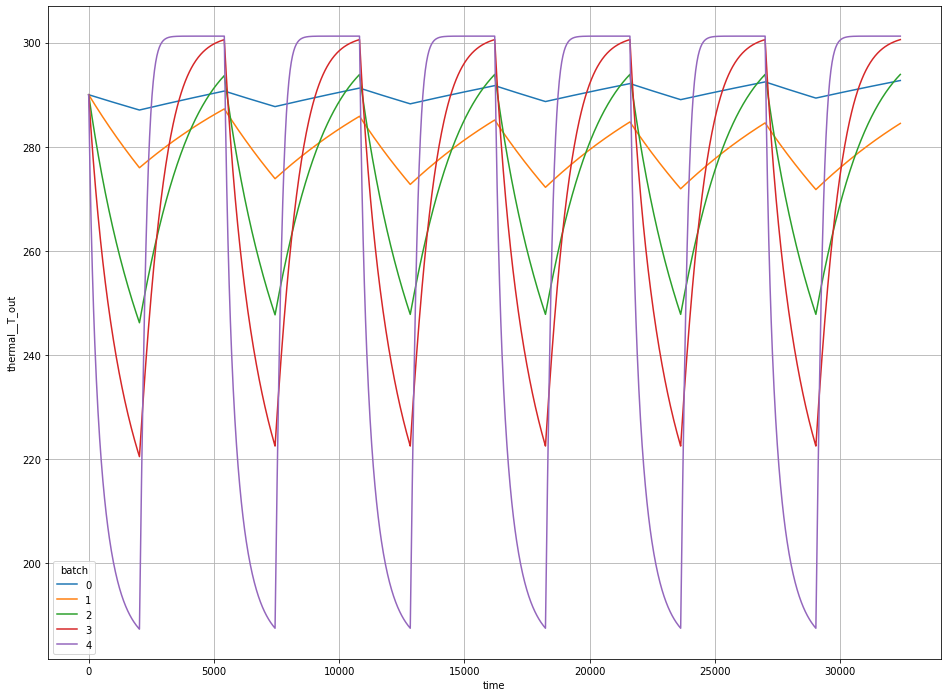

In [26]:
ds_out_batch.thermal__T_out.plot.line(hue='batch', figsize=(16, 12))
plt.grid()